In [51]:
install.packages("wbstats")
library(wbstats)


Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In the World Bank dataset for China (CN), World (WLD), and the United States (US), certain economic and demographic indicators might reasonably follow a normal distribution over time or across observations. Generally, indicators that show steady, gradual change or annual fluctuations (without extreme spikes) are more likely to approximate a normal distribution.

In the wbstats package, each country or region has a unique ISO 2-code used to specify it when retrieving data. Here are some common codes:

China: "CN"
World: "WLD"
United States: "US"

Here are some indicators from the World Bank data that might approximate a normal distribution:

1. GDP Growth Rates (Annual %)
Indicator Code: NY.GDP.MKTP.KD.ZG
Reasoning: Annual GDP growth rates generally fluctuate within a small range year over year, often centering around a mean growth rate. If there are no extreme outliers or economic shocks, GDP growth rates might approximate a normal distribution.
2. Inflation, Consumer Prices (Annual %)
Indicator Code: FP.CPI.TOTL.ZG
Reasoning: Inflation rates often vary around a central mean, especially in stable economies. While inflation may not always be perfectly normal, moderate inflation without hyperinflation or deflation could follow a normal-like distribution.
3. Life Expectancy at Birth (Years)
Indicator Code: SP.DYN.LE00.IN
Reasoning: Life expectancy tends to increase slowly over time, especially in developed countries. Although it may have a slight upward trend, annual increments are often stable, creating a distribution that may approximate normality over long time periods.
4. Population Growth (Annual %)
Indicator Code: SP.POP.GROW
Reasoning: Population growth rates typically change incrementally and may center around a stable mean. They can approximate a normal distribution in a period without major demographic shifts.
5. Unemployment Rate, Total (% of Total Labor Force)
Indicator Code: SL.UEM.TOTL.ZS
Reasoning: For large countries or regions, the unemployment rate tends to fluctuate within a stable range over time, and in the absence of economic crises, this can sometimes approximate a normal distribution.
How to Test for Normality
Once you retrieve these indicators in R, you can:

Use Shapiro-Wilk Test: To statistically test for normality.
Visualize with Q-Q Plots and Histograms: This can provide insights into whether the data resembles a normal distribution.
If you'd like assistance with retrieving these indicators from the World Bank API or analyzing them in R, feel free to ask!
https://data.worldbank.org/?locations=CN-1W-US 

In [54]:
library(wbstats)

# Get a list of all available countries and regions with their codes
countries <- wb_countries()
print(countries)  # View the first few rows

# A tibble: 296 × 18
   iso3c iso2c country capital_city longitude latitude region_iso3c region_iso2c
   <chr> <chr> <chr>   <chr>            <dbl>    <dbl> <chr>        <chr>       
 1 ABW   AW    Aruba   Oranjestad      -70.0     12.5  LCN          ZJ          
 2 AFE   ZH    Africa… NA               NA       NA    NA           NA          
 3 AFG   AF    Afghan… Kabul            69.2     34.5  SAS          8S          
 4 AFR   A9    Africa  NA               NA       NA    NA           NA          
 5 AFW   ZI    Africa… NA               NA       NA    NA           NA          
 6 AGO   AO    Angola  Luanda           13.2     -8.81 SSF          ZG          
 7 ALB   AL    Albania Tirane           19.8     41.3  ECS          Z7          
 8 AND   AD    Andorra Andorra la …      1.52    42.5  ECS          Z7          
 9 ARB   1A    Arab W… NA               NA       NA    NA           NA          
10 ARE   AE    United… Abu Dhabi        54.4     24.5  MEA          ZQ          
# ℹ 286

In [57]:
library(wbstats)
library(dplyr)

# List of all available countries and regions
countries <- wb_countries()

# Search for "World" or similar to see all options
countries %>% filter(grepl("World", country, ignore.case = TRUE))

iso3c,iso2c,country,capital_city,longitude,latitude,region_iso3c,region_iso2c,region,admin_region_iso3c,admin_region_iso2c,admin_region,income_level_iso3c,income_level_iso2c,income_level,lending_type_iso3c,lending_type_iso2c,lending_type
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ARB,1A,Arab World,NA,NA,NA,NA,NA,Aggregates,NA,NA,NA,NA,NA,Aggregates,NA,NA,Aggregates
WLD,1W,World,NA,NA,NA,NA,NA,Aggregates,NA,NA,NA,NA,NA,Aggregates,NA,NA,Aggregates


In [59]:
colnames(data)[colnames(data) == "NY.GDP.MKTP.KD.ZG"] <- "gdp_growth_rate"
colnames(data)[colnames(data) == "SL.UEM.TOTL.ZS"] <- "unemployment_rate"
colnames(data)[colnames(data) == "SP.POP.TOTL"] <- "population_total"

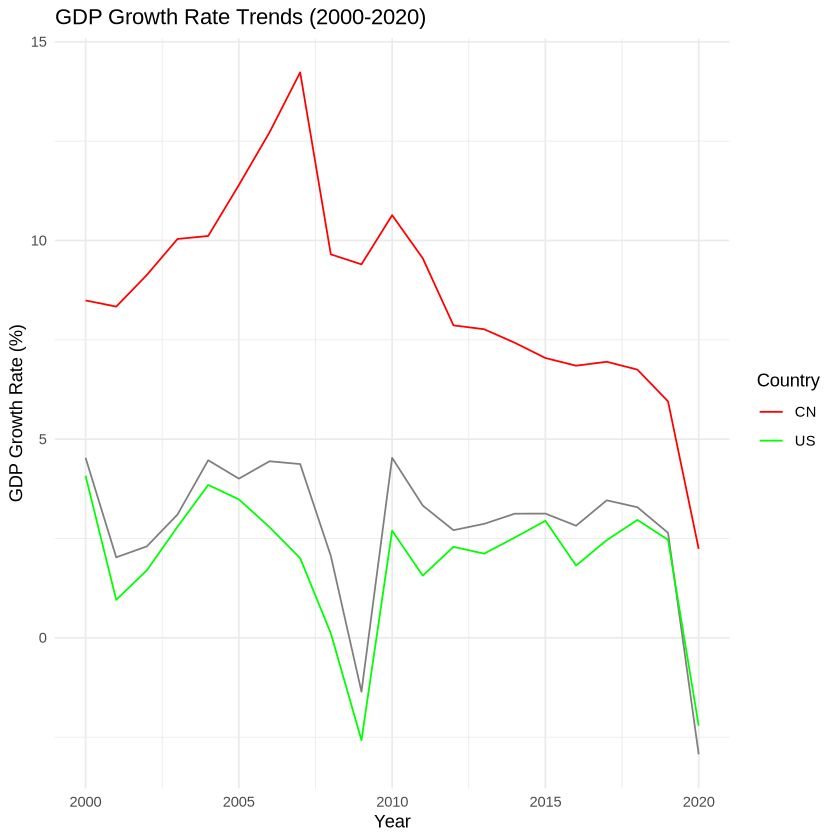

In [60]:
library(ggplot2)

ggplot(data, aes(x = date, y = gdp_growth_rate, color = iso2c)) +
  geom_line() +
  labs(title = "GDP Growth Rate Trends (2000-2020)",
       x = "Year", y = "GDP Growth Rate (%)",
       color = "Country") +
  scale_color_manual(values = c("CN" = "red", "WLD" = "blue", "US" = "green")) +
  theme_minimal()

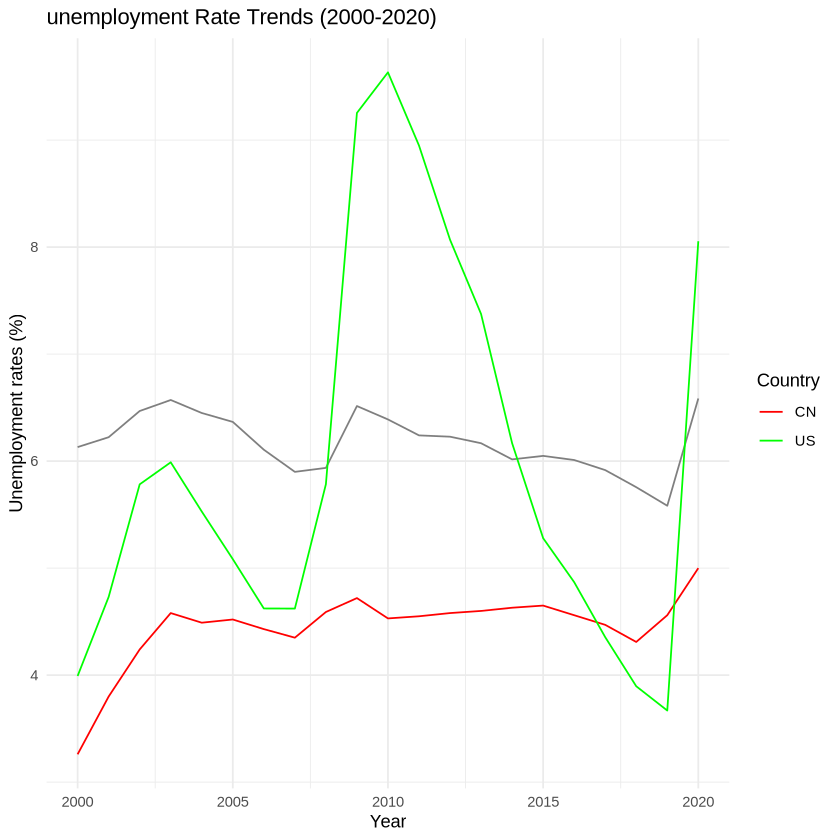

In [61]:
library(ggplot2)

ggplot(data, aes(x = date, y = unemployment_rate, color = iso2c)) +
  geom_line() +
  labs(title = "unemployment Rate Trends (2000-2020)",
       x = "Year", y = "Unemployment rates (%)",
       color = "Country") +
  scale_color_manual(values = c("CN" = "red", "WLD" = "blue", "US" = "green")) +
  theme_minimal()

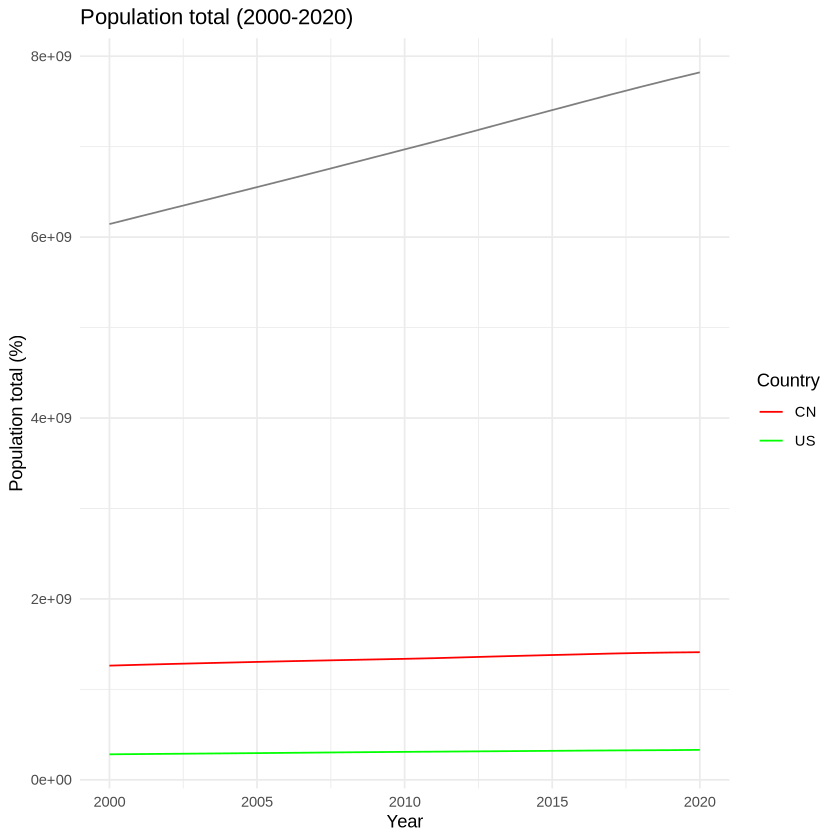

In [63]:
library(ggplot2)

ggplot(data, aes(x = date, y = population_total, color = iso2c)) +
  geom_line() +
  labs(title = "Population total (2000-2020)",
       x = "Year", y = "Population total (%)",
       color = "Country") +
  scale_color_manual(values = c("CN" = "red", "WLD" = "blue", "US" = "green")) +
  theme_minimal()